# Text Analysis of Game of Thrones


---

## Motivation

The Game of Thrones universe is incredibly vast and there is a wide range of options we can analyse, as a result of the many possibilities. In our previous notebook, we chose only to look at specific characters and analyse them individually, and only compare them by conducting a seperate sentiment analysis. We felt that some of the findings and conclusion were vague, so we have chosen to expand our text analysis for this project. We hope to do a more general analysis of more characters and get a bigger overview. We personally chose five characters to analyse in the previous notebook and those choices were biased. So here we will define other parameters which will decide which characters to analyse more in-depth. 


The data we will be using to conduct the extended text analysis is a downloaded dataset, since we already web scraped in the other one. We also wanted a dataset which would be easier to define clear-cut definitions of 'important characters' and also to extend our definition for the sentiment analysis. We downloaded our data from [Kaggle](https://www.kaggle.com) by the author [albenft](https://www.kaggle.com/albenft). This data contains the entire script, line by line, from the TV-series. Due to the specificity of this dataset, we are unable to objectively examine a character's impact and importance on the storyline based off their descriptions and actions, however, we are able to use the conversations and sentences spoken by characters.

From these conversations and sentences, we can define a baseline of importance:
 * Which character:
     * says the most words
     * have the most lines
 * Sentiment:
     * There has to be a clear distinction between positive and negative, if not the sentiment will be neutral
     
Based of how much a character say, we can then assume they are active throughout the entirety of the series.

By enforcing these baselines, we want to see which characters are most important in the TV-series, from that we will choose characters to analyse more in-depth. We will provide text analysis such as wordclouds and a sentiment analysis based on the library `TextBlob`, instead of the subjectivity lexicon we used for our first analysis. 

At the end we want to compare our findings with the other text analysis, to see it was the dataset or which tools we used to analyse; that made our conclusions vague, or if that is how the TV-series were written. 

---

## Data

The dataset used for text analysis has been downloaded [Here](https://www.kaggle.com/albenft/game-of-thrones-script-all-seasons) (or download the .csv file). The data comprises of the entire script of the TV-series, with the following attributes:
 * Release Date:
     * string that provides the date when the episode aired 
 * Season:
     * string with each season value (there are eight seasons in total)
 * Episode:
     * string which contains the number of episodes
 * Episode Title
     * string with episode title
 * Name:
     * string with character names
 * Sentence:
     * string with character's conversation

Short summary, our data contains:
 * 6 columns that have different values for various purposes
 * Size of 23,911 rows (2.8 MB)

In [1]:
# Importing necessary libraries
import pandas as pd
from nltk import word_tokenize
import re
from nltk.corpus import stopwords
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Default graph set-up
def setup_mpl():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['lines.linewidth'] = 1
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.dpi'] = 100
setup_mpl()

In [2]:
data = pd.read_csv('../data/Game_of_Thrones_Script.csv')
data

Release Date    Season    Episode     Episode Title              Name  \
0       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
1       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
2       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
3       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
4       2011-04-17  Season 1  Episode 1  Winter is Coming             gared   
...            ...       ...        ...               ...               ...   
23906   2019-05-19  Season 8  Episode 6   The Iron Throne           brienne   
23907   2019-05-19  Season 8  Episode 6   The Iron Throne             bronn   
23908   2019-05-19  Season 8  Episode 6   The Iron Throne  tyrion lannister   
23909   2019-05-19  Season 8  Episode 6   The Iron Throne               man   
23910   2019-05-19  Season 8  Episode 6   The Iron Throne               all   

                                                Sentence  
0      What do you expect? They're savages. One lot s...  
1      I've never seen wildlings do a thing like this...  
2                                 How close did you get?  
3                                Close as any man would.  
4                       We should head back to the wall.  
...                                                  ...  
23906  I think we can all agree that ships take prece...  
23907      I think that's a very presumptuous statement.  
23908  I once brought a jackass and a honeycomb into ...  
23909                            The Queen in the North!  
23910  The Queen in the North! The Queen in the North...  

[23911 rows x 6 columns]

### Basic Statistics

In [3]:
print( 'Total number of characters featured in Game of Thrones:' , len(data['Name'].unique()))

Total number of characters featured in Game of Thrones: 565


The data used for this analysis has pretty much already been preprocessed, due to that we will be able to learn a lot about the data, as DataFrames are easy to work with. The only processing step in this section is to tokenize the sentences.

As stated in the motivation, the baseline of importance in this analysis how much a character speak. So the first step is to tokenise the sentences using the library `NLTK`.

In [4]:
# Tokenize
tokens = data['Sentence'].apply(lambda x: word_tokenize(x))
data['Tokens'] = tokens

# We only want alphanumeric
tokens = data['Tokens'].apply(lambda x: [item for item in x if item.isalnum()])
data['Tokens'] = tokens

# We want to add the number of tokens spoken by each character for each sentence 
word_count = data['Tokens'].apply(len)
data['Word Count'] = word_count
data.head()

Release Date    Season    Episode     Episode Title          Name  \
0   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
1   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
2   2011-04-17  Season 1  Episode 1  Winter is Coming  waymar royce   
3   2011-04-17  Season 1  Episode 1  Winter is Coming          will   
4   2011-04-17  Season 1  Episode 1  Winter is Coming         gared   

                                            Sentence  \
0  What do you expect? They're savages. One lot s...   
1  I've never seen wildlings do a thing like this...   
2                             How close did you get?   
3                            Close as any man would.   
4                   We should head back to the wall.   

                                              Tokens  Word Count  
0  [What, do, you, expect, They, savages, One, lo...          25  
1  [I, never, seen, wildlings, do, a, thing, like...          21  
2                        [How, close, did, you, get]           5  
3                       [Close, as, any, man, would]           5  
4            [We, should, head, back, to, the, wall]           7

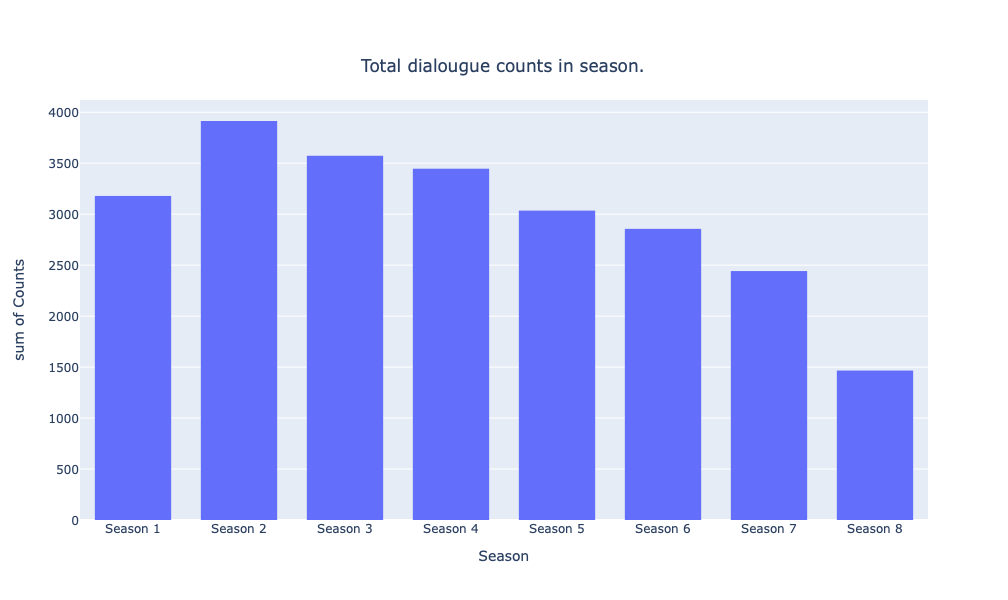

In [5]:
# Let us look at the total dialogue count for each season
dia = data['Season'].value_counts().reset_index()
dia.columns=['Season', 'Counts']
dia.sort_values(by='Season', inplace=True)
fig = px.histogram(dia, x='Season', y='Counts', title='Dialougue Count per Season')
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    title={
        
        'text': "Total dialougue counts in season.",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

Here we can see that season 2 has the most dialogue, where season 8 has the least. Is there more actions than dialogue? To answer that we have to find out how many episodes there are per season. 

In [6]:
print(data.query('Season == "Season 1"')['Episode'].agg(['nunique','count']))
print(data.query('Season == "Season 2"')['Episode'].agg(['nunique','count']))
print(data.query('Season == "Season 3"')['Episode'].agg(['nunique','count']))
print(data.query('Season == "Season 4"')['Episode'].agg(['nunique','count']))
print(data.query('Season == "Season 5"')['Episode'].agg(['nunique','count']))
print(data.query('Season == "Season 6"')['Episode'].agg(['nunique','count']))
print(data.query('Season == "Season 7"')['Episode'].agg(['nunique','count']))
print(data.query('Season == "Season 8"')['Episode'].agg(['nunique','count']))

nunique      10
count      3179
Name: Episode, dtype: int64
nunique      10
count      3914
Name: Episode, dtype: int64
nunique      10
count      3573
Name: Episode, dtype: int64
nunique      10
count      3446
Name: Episode, dtype: int64
nunique      10
count      3035
Name: Episode, dtype: int64
nunique      10
count      2856
Name: Episode, dtype: int64
nunique       7
count      2442
Name: Episode, dtype: int64
nunique       6
count      1466
Name: Episode, dtype: int64


So we can now assume that the reason for that season 8 does not have as much dialogue as earlier seasons, is due to the lesser number of episodes. 

#### Which characters are important?

An initial analysis can be done by plotting which characters has spoken the most, and here "spoken the most" is defined by the accumulated number of tokens the character has spoken:

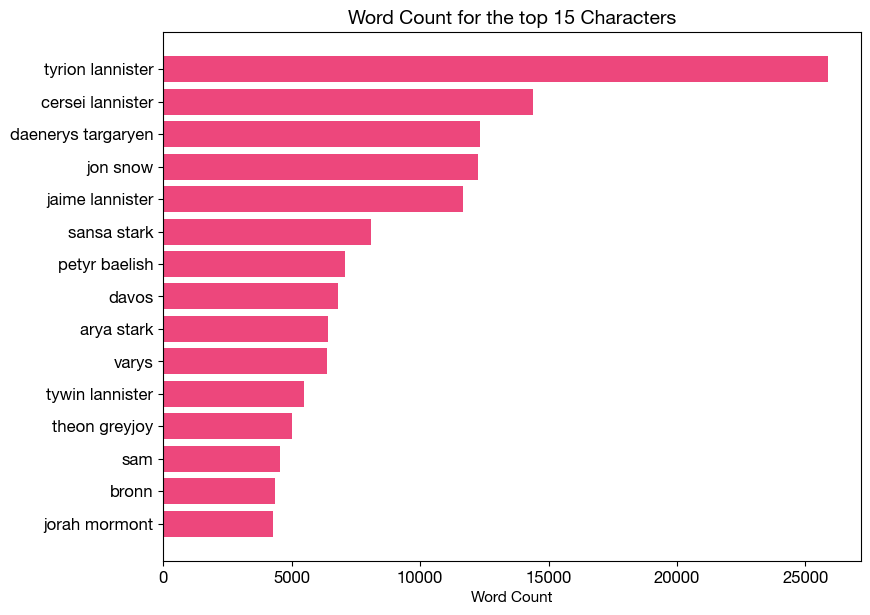

In [7]:
# Total number of tokens for each character
char_word = data.groupby(['Name'])['Word Count'].sum().reset_index().sort_values(by=['Word Count'], ascending=[0])

# Top 15 characters are chosen
names = np.array(char_word.head(15)['Name'].tolist())
word_count = np.array(char_word.head(15)['Word Count'].tolist())

# Plotting the accumulated word count for the top 15 characters
fig, ax = plt.subplots(figsize=(9,7))
y = np.arange(len(names))
ax.barh(y, word_count, align='center', color='#ed477c')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y)
ax.set_yticklabels(names, size=12)
ax.tick_params(axis='x', labelsize=12)
ax.set_xlabel('Word Count', size=11)
ax.set_title('Word Count for the top 15 Characters', size=14, weight=250, ha='center')
sns.set_style('darkgrid')
plt.show()

From the distribution we can see that the Lannister siblings all are in top 5, where Tyrion and Cersei are number 1 and 2 respectively. Also in top 5 we can find Jon and Daenerys. After top 5, the word count goes to under 10,000 tokens (words) that a character has spoken. The lowest number of words spoken by a character of top 15 is Jorah Mormont with less than 5,000 words. Jorah Mormotn speaks 5 times less than the most spoken character: Tyrion. Tyrion speaks a lot more than the rest, approximatley 10,000 word more than Cersei.  

Is this enough to say that these are the most important characters? Instead of taking the number of words a character has spoken, let us instead look at the total number of lines/sentences a character has, and if this changes some of the top 15.

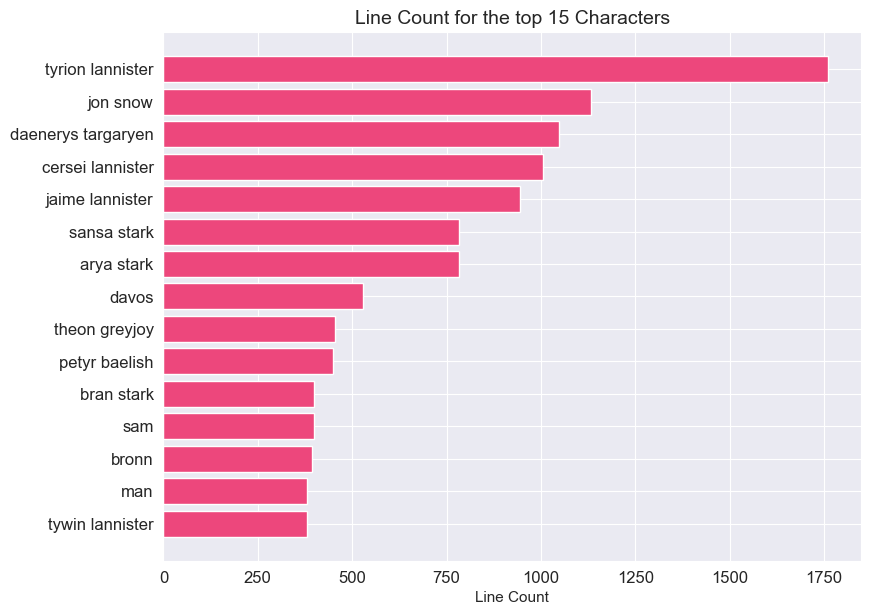

In [8]:
# Plotting the character which have the most lines, to see if it corresponds 
# to top characters per word

# How many lines a character has
char_line = data.groupby(['Name'])['Sentence'].count().reset_index().sort_values(by=['Sentence'], ascending=[0])

# Get top 15
names = np.array(char_line.head(15)['Name'].tolist())
line_count = np.array(char_line.head(15)['Sentence'].tolist())

# Plotting the accumulated line count for the top 15 characters
fig, ax = plt.subplots(figsize=(9,7))
y = np.arange(len(names))
ax.barh(y, line_count, align='center', color='#ed477c')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(y)
ax.set_yticklabels(names, size=12)
ax.tick_params(axis='x', labelsize=12)
ax.set_xlabel('Line Count', size=11)
ax.set_title('Line Count for the top 15 Characters', size=14, weight=250, ha='center')
sns.set_style('darkgrid')
plt.show()

Looking at top 15, we see that the top 5 does not change from word count to line count (Jon Snow and Daenerys Targaryen switch placement). So by our baseline, these most be the most important characters from the TV-script dataset. The next characters on top 15 are also the same, though some of them have changed position - meaning either they say a lot, but not that often; or they say less, but more frequently. 

So from our definition of 'an important character' (based of our dataset), the top 5 most important characters are:
 1. Tyrion Lannister
 2. Cersei Lannister
 3. Jon Snow
 4. Daenerys Targaryen 
 5. Jaimie Lannister
 
In the next section we will take a closer look at them, see what we can learn about them.

---

## Tools, Theory, and Analaysis

### Wordclouds

The `wordcloud`library is a great tool for text analysis. A wordcloud generates a cloud of words with different size and proportion which depends on how often a word occurs in the character's document. Here we will generate wordclouds for the top 5 character's word count. Top 5 is chosen because after the the 5th person, the word count decreases with a few thousand words.  

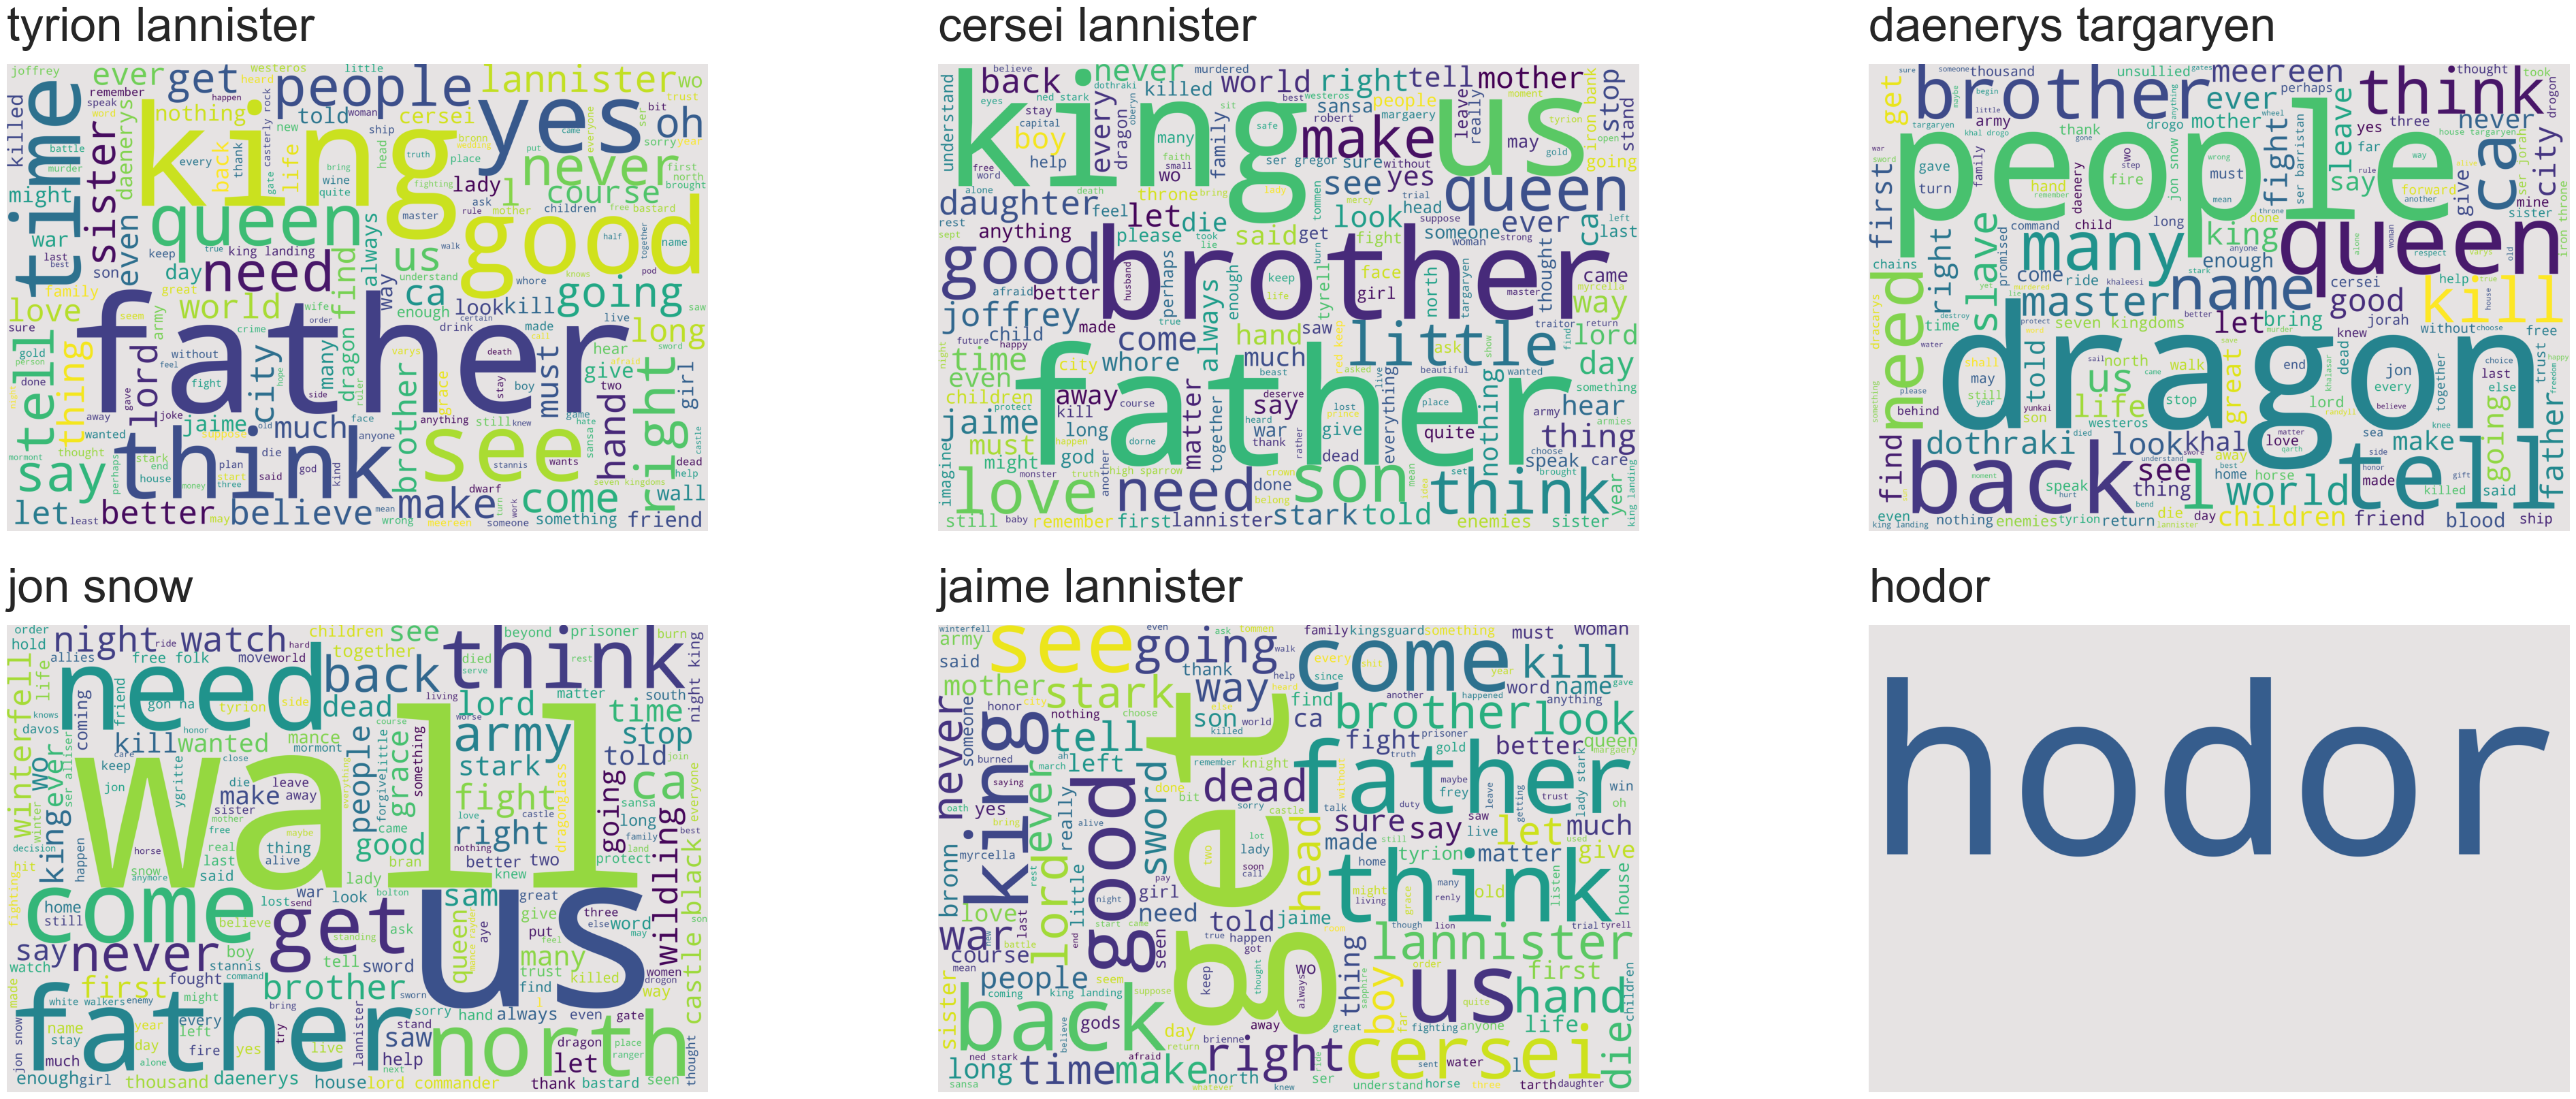

In [9]:
# Removing stop words (so it does not affect the wordcloud)
stop_words = stopwords.words('english')

# Adding my own stop word
stop_words.extend(['one', 'know', 'would', 'could', 'want', 'like', 'take', 'well', 'men', 'man', 'go'])

# Get top 5 characters
top = data.groupby(['Name'])['Word Count'].sum().reset_index().sort_values(by=
                            ['Word Count'], ascending=[0]).head(5)['Name'].tolist()

# Add Hodor to the list (he only says one word, so this would be entertaining)
top.append('hodor')

# wordcloud function
def wordcloud_draw(char):
    char_name = char
    wordlist = data[data['Name'] == char_name]
    wordlist = wordlist['Tokens'].tolist()
    
    words = []
    for i in wordlist:
        words.extend(i)
    words = ''.join(i.lower() + ' ' for i in words)
    
    wordcloud = WordCloud(background_color='#e6e3e3', width=3000,
                      height=2000, stopwords=stop_words).generate(words)
    
    return wordcloud
    
# iterate over 6 characters to generate wordclouds
fig = plt.figure(figsize=(50,20))
for i, char in enumerate(top):
    ax = fig.add_subplot(2,3,i+1)
    wordcloud = wordcloud_draw(char)
    
    ax.imshow(wordcloud)
    ax.text(0, 1.05, char, transform=ax.transAxes, size=50)
    ax.axis('off')
    #wordcloud.to_file('{}.png'.format(char))


From the wordclouds we can observe a lot about the characters; what they say and/or interactions with other characters:
* Tyrion:
    - He often talks about his family, his **father** in particular. During his upbringing his father and sister treated him like a social pariah, Tyrion genuinely wants to feel accepted and loved. As the character who has the highest word count, and is known to be a very talkative character (he talks his way out of most battles), we can see word such as **see**, **good**, **yes**, **think**, and so forth. We can also see words such as **queen**, which my refer to Daenerys, whom he follows, or his **sister**. 
* Cersei:
    - Like Tyrion, she refers to her father a lot; they also have stronger relationship than Tyrion; their father actually somewhat respects Cersei. Her life has for many years been as the **queen** of the Seven Kingdoms, and the mother of the preceeding **kings**, her **sons**. Cersei is well-known for her incestuous relationship with her **brother** Jaimie, whom she loves very much. 
* Daenerys: 
    - She is the mother of **dragons** and to the slaves she has freed; they call her their **queen**. When she speaks to them, she says that they are no slaves, but **people** and speaks directly to the enslaved in the Free Cities. During the first several seasons she is not in Westeros, but she is preparing to eventually come **back** to Westeros to claim what is hers; the iron throne. 
* Jon:
    - As a part of the Night's Watch and the successor of the commander, he refers to the brotherhood as **us**, or when he speaks to the houses of the North. As a part of the Night's Watch, they protect the wall from the other side; where the Free Folk lives (and consequently the white walkers later). 
* Jaimie:
    - Just like his siblings, he says **father** a lot, as well as his other half **cersei**. He has a hectic storyline, where he is home-away-home on multiple occasions. During these 'away' he always needs to **get** **back** for Cersei or his children. 

From the text analysis, House Lannister is very dominant in the series; the siblings all share much of the same vocabulary even though all of them have signigifant different storylines after a few seasons. Whilst Jon and Daenerys still share some of the words, but as they belong to different places most of the series, they have a more variety in their wordcloud. 

### Sentiment Analysis

Sentiment analysis is a powerful tool in natural languge processing to measure about people's inclination, here characters, because it can determine whether or not a document is positive/negative/neutral. We can also attain information about the subjectivity of a document; this can be done using `nltk.sentiment.vader` and `TextBlob`. These libraries are good, since we do not need any sort of training data to calculate sentiment.

Firstly we will use `nltk.sentiment.vader`, it is a lexicon and rule-based sentiment analysis tool. We can use it for polarities (positive/negative) and quantifies how much positive/negatove emotion the document has, including intensity. The output of using the `SentimentIntensityAnalyzer()` gives us the following:
   * Positive
   * Negative
   * Neutral 
   * Compound
   
Compund normalises the sum of positive/negative/neutral scores and thus lies between 1 (extremely positive) and -1 (extremely negative).

In [10]:
sent_names = data.groupby(['Name'])['Sentence'].sum().reset_index().sort_values(by=['Sentence'], ascending=[0])

In [11]:
char = ['tyrion lannister', 'cersei lannister', 'jon snow', 'daenerys targaryen', 'jaime lannister']
char_dict = {i[0]: i[1] for i in sent_names.values if i[0] in char}

In [12]:
sentiment = SentimentIntensityAnalyzer()
for sent in char:
    print('polarity scores for: ', sent, sentiment.polarity_scores(char_dict[sent]))

polarity scores for:  tyrion lannister {'neg': 0.143, 'neu': 0.708, 'pos': 0.148, 'compound': 0.9966}
polarity scores for:  cersei lannister {'neg': 0.127, 'neu': 0.729, 'pos': 0.144, 'compound': 0.9998}
polarity scores for:  jon snow {'neg': 0.116, 'neu': 0.768, 'pos': 0.116, 'compound': -0.9941}
polarity scores for:  daenerys targaryen {'neg': 0.116, 'neu': 0.753, 'pos': 0.131, 'compound': 0.9997}
polarity scores for:  jaime lannister {'neg': 0.144, 'neu': 0.737, 'pos': 0.118, 'compound': -0.9999}


From the calculated sentiment scores, we can see that each character have +70% neutral in sentiment. When looking at the compound score, they divide more.
**Tyrion**, **Cersei**, and **Daenerys** have an extremely high compund score, thus they are highly positive in sentiment. On the other hand we have **Jon** and **Jamie** whose scores are extremely negative, so they are highly negative in sentiment. 

To visualise this, we will use`TextBlob`, as it is easier to save the computed scores.

In [13]:
data['Sentiment'] = data['Sentence'].apply(lambda x: TextBlob(x).sentiment)
data['Polarity'] = data['Sentiment'].apply(lambda x: x[0])
data['Subjectivity'] = data['Sentiment'].apply(lambda x: x[1])

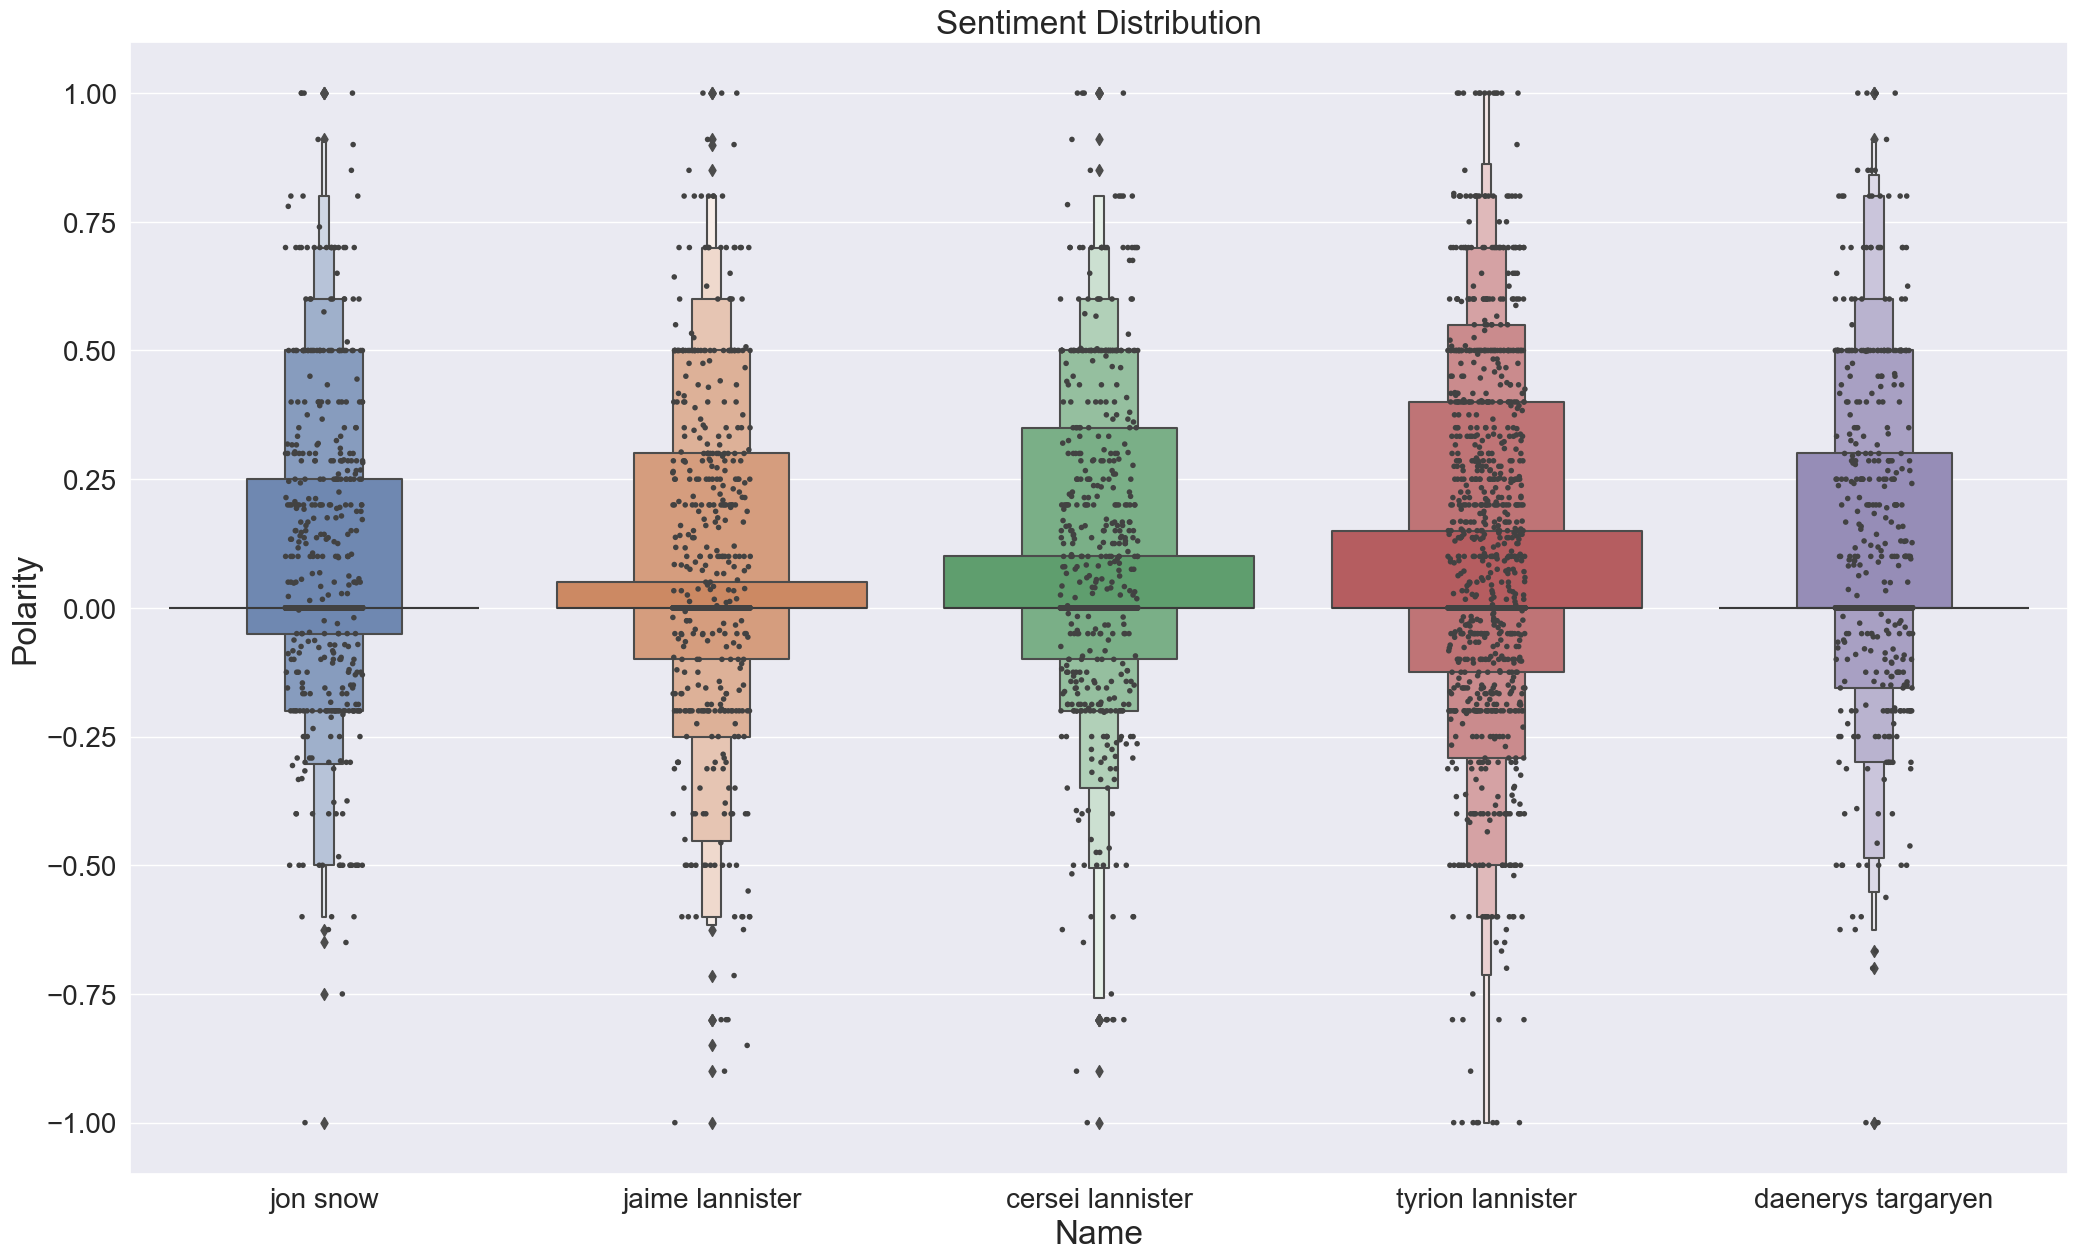

In [15]:
Name = top.remove('hodor')
fig, ax = plt.subplots(figsize=(25,15))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
sns.set(font_scale = 2)
sns.stripplot(x='Name', y='Polarity', data=data[data['Name'].isin(top)],
              size=4, color=".26")
sns.boxenplot(x='Name', y='Polarity', data=data[data['Name'].isin(top)]).set_title('Sentiment Distribution')
plt.show()
fig.savefig('boxplot.png')

From the boxplot we can see that all characters lie around neutral sentiment. The `stripplot` shows how the sentences are distributed - as we saw from `SentimentIntensityAnalyzer()`that Tyrion is highly positive in sentiment (as most of the dots is concentrated from neutral 0 and up), as well as Cersei. However, the rest of the characters are difficult to distinguish between, if they are more positive or negative in sentiment. 

Using `TextBlob` again, we will visualise the subjecitvity of the characters:

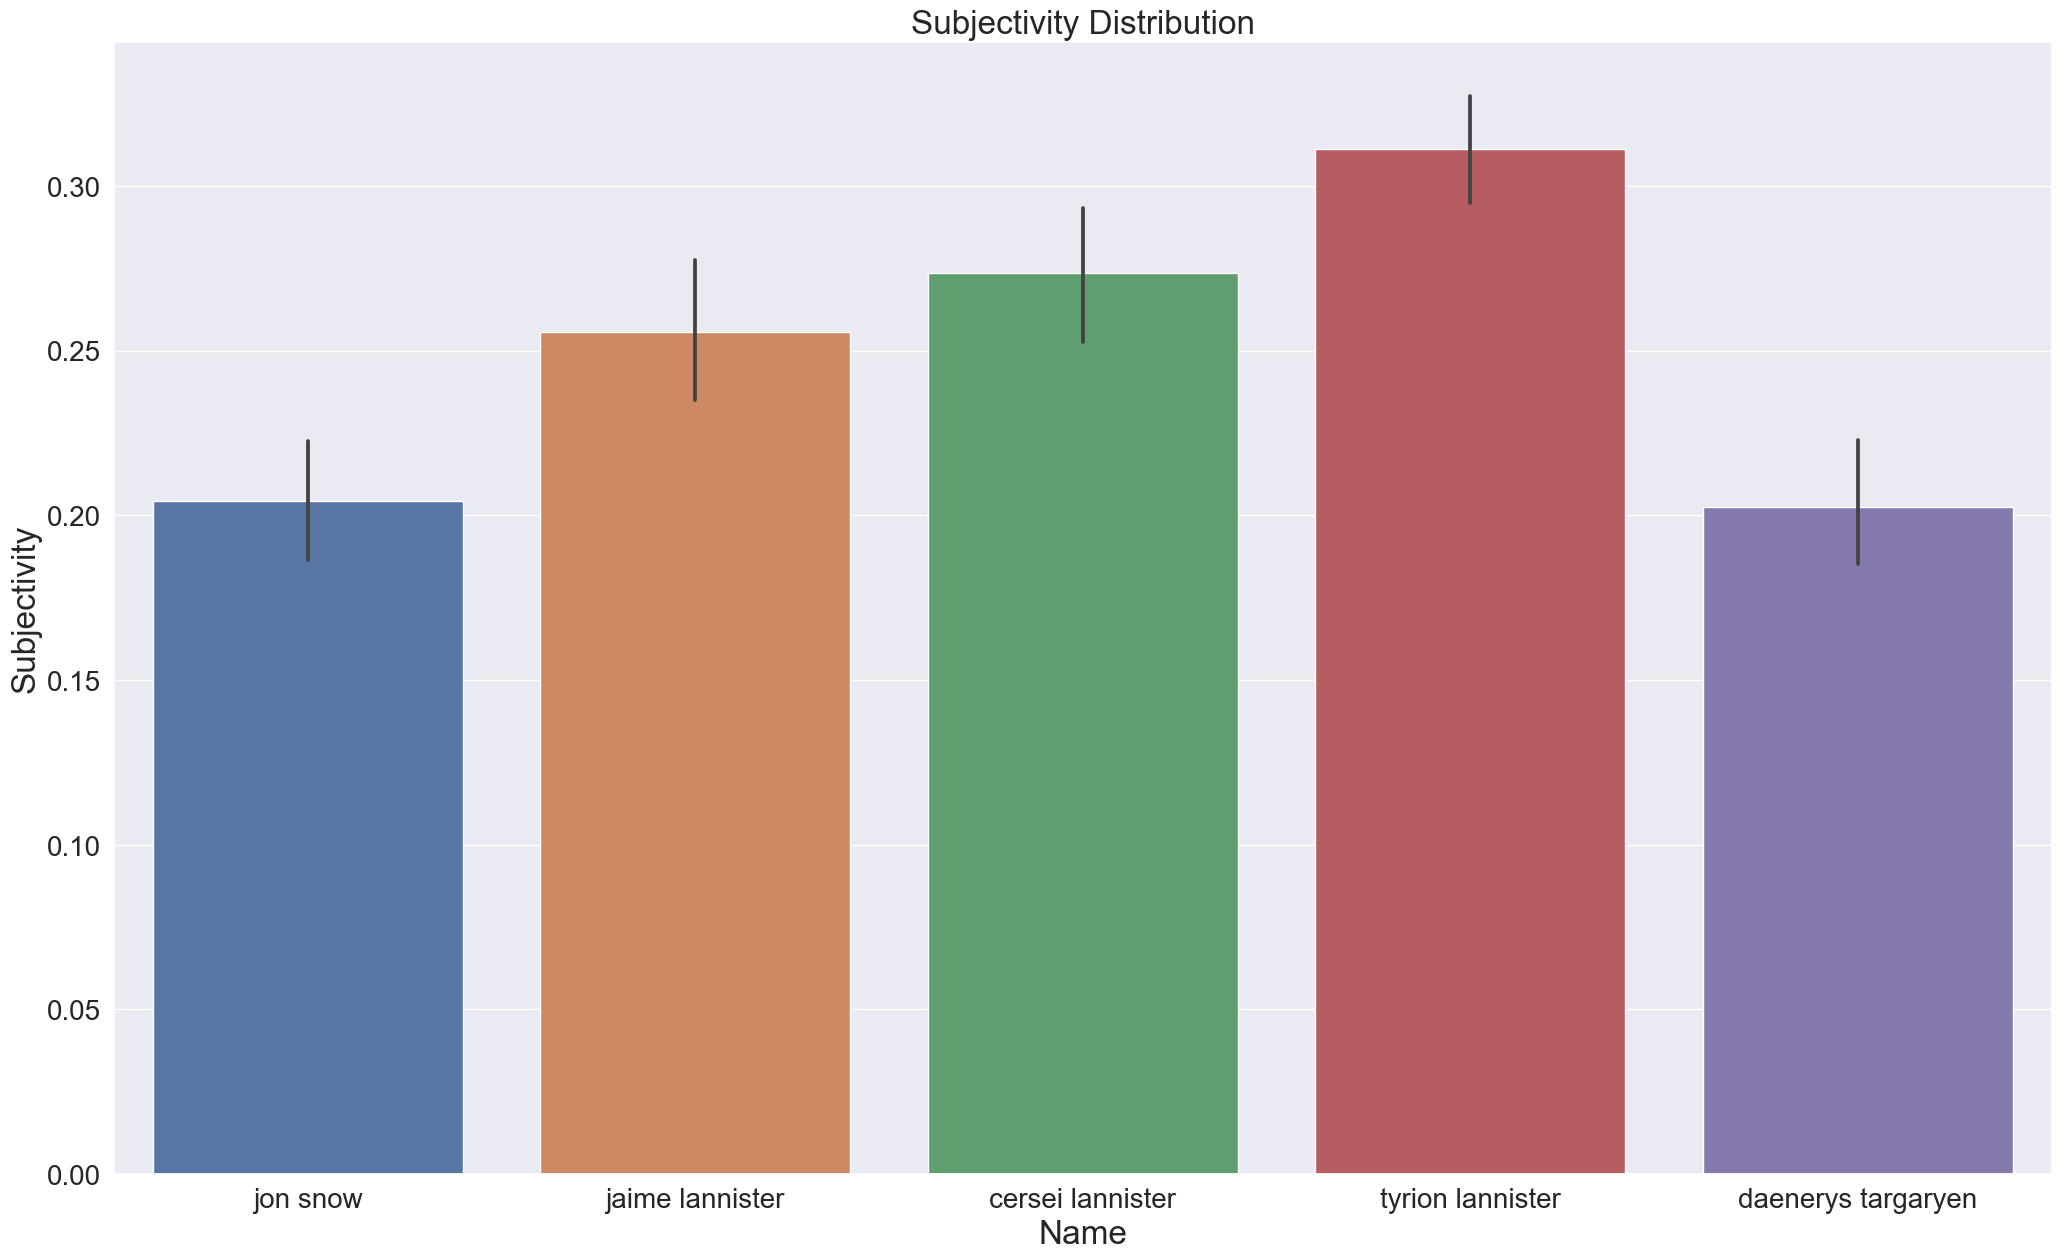

In [16]:
fig, ax = plt.subplots(figsize=(25,15))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
sns.barplot(x='Name', y='Subjectivity', data=data[data['Name'].isin(top)]).set_title('Subjectivity Distribution')
plt.show()
fig.savefig('barplot.png')

From the plot we can see that Tyrion has the most subjective language, however, it is only at approximately 30%, which is not a lot in general. So we can say that the top 5 characters are not subjective.

---

## Discussion

#### Comparing our two analysis

Since we could download clean data to work with, we were able to play with it and got to know it much better than the web scraped data. We were able to visualise our data, as well as choosing appropriate baselines before conducting our text analysis. We got more insight about the characters from our first analysis, but we had a larger document with the script. Our sentiment analysis concluded mostly the same: that they are mostly neutral in sentiment and low in subjectivity. 

#### What went well

1. We were able to create a baseline to compare our findings with, which we did not have for the first analysis. We chose the 5 characters, however, from this dataset we found them through knowing more about the data.
2. The wordclouds made sense from a script perspective. 
3. We were able to successfully complete our goals for this project (text analysis)

#### What is still missing? What could be improved?

1. We were unable to understand the character's actions and behaviour, because we analysed what they said, not what was said about them. In the future, we could also analyse how other characters describe each other, to gain more insight about who the character's are. In our first analysis we were able to get a little more information surrounding their actions and storyline. 
2. We would most likely get different results if we also compared the script with the books, as they are more in-depth. 
3. Instead of using built-in libraries, we could create our own classifier to conduct the sentiment analysis. 

#### Contribution

All members of the group contributed equally to this project.